In [2]:
import sqlite3
import pandas as pd

In [3]:
df_1 = pd.read_csv('ChicagoCensusData.csv')
# iniciar una base de datos FinalDB.db y guardar en ella el df_1 como CENSUS_DATA
conn = sqlite3.connect('FinalDB.db')
df_1.to_sql('CENSUS_DATA', conn, if_exists='replace', index=False)


78

In [4]:
pd.read_csv('ChicagoPublicSchools.csv').to_sql('CHICAGO_PUBLIC_SCHOOLS', conn, if_exists='replace', index=False)

566

In [5]:
pd.read_csv('ChicagoCrimeData.csv').to_sql('CHICAGO_CRIME_DATA', conn, if_exists='replace', index=False)

533

In [6]:
# crear un cursor para ejecutar comandos SQL
cur = conn.cursor()

In [9]:
consulta = cur.execute('SELECT COUNT(*) FROM CHICAGO_CRIME_DATA')
consulta.fetchall()

[(533,)]

In [12]:
consulta = cur.execute('SELECT * FROM CHICAGO_CRIME_DATA WHERE DESCRIPTION LIKE "%CHILD%"')
len(consulta.fetchall())

3

In [18]:
consulta = cur.execute('SELECT DISTINCT(PRIMARY_TYPE) FROM CHICAGO_CRIME_DATA WHERE LOCATION_DESCRIPTION LIKE "%SCHOOL%"')
len(consulta.fetchall())

6

In [23]:
consulta = cur.execute('SELECT AVG(SAFETY_SCORE) FROM CHICAGO_PUBLIC_SCHOOLS WHERE "ELEMENTARY, MIDDLE, OR HIGH SCHOOL" = "MS"')
consulta.fetchall()

[(48.0,)]

In [30]:
consulta = cur.execute('SELECT COMMUNITY_AREA_NUMBER, COUNT(*) FROM CHICAGO_CRIME_DATA GROUP BY COMMUNITY_AREA_NUMBER ORDER BY COUNT(*) DESC LIMIT 12')
consulta.fetchall()

[(25.0, 43),
 (None, 43),
 (23.0, 22),
 (68.0, 21),
 (29.0, 16),
 (28.0, 16),
 (8.0, 15),
 (71.0, 14),
 (24.0, 13),
 (67.0, 12),
 (66.0, 12),
 (69.0, 11)]

In [5]:
import pandas as pd

df = pd.read_csv('ChicagoPublicSchools.csv')
df.describe()

,School_ID,ZIP_Code,SAFETY_SCORE,Environment_Score,Instruction_Score,Rate_of_Misconducts__per_100_students_,ISAT_Exceeding_Math__,ISAT_Exceeding_Reading__,ISAT_Value_Add_Math,ISAT_Value_Add_Read,COLLEGE_ENROLLMENT,General_Services_Route,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,Ward,Police_District
count,566.000000,566.000000,513.000000,513.000000,513.000000,566.000000,476.000000,476.000000,468.000000,468.000000,566.000000,566.000000,5.660000e+02,5.660000e+02,566.000000,566.000000,566.000000,566.000000,566.000000
mean,609681.791519,60629.727915,49.504873,47.766082,48.288499,21.085866,20.356303,15.667017,0.068590,0.022650,626.053004,39.084806,1.163016e+06,1.885663e+06,41.841890,-87.677323,37.706714,22.060071,11.710247
std,8831.060946,20.248024,20.110837,16.215584,17.417176,27.543835,16.850870,15.208361,1.041174,1.042543,448.495105,6.165552,1.605930e+04,3.285688e+04,0.090361,0.058390,21.584135,13.645574,6.688582
min,400018.000000,60605.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-3.500000,-5.000000,21.000000,29.000000,1.118114e+06,1.817242e+06,41.653674,-87.841052,1.000000,1.000000,1.000000
25%,609873.250000,60618.000000,35.000000,37.000000,37.000000,4.525000,9.175000,6.100000,-0.600000,-0.600000,342.250000,34.000000,1.152166e+06,1.860248e+06,41.771866,-87.717152,23.000000,10.000000,7.000000
50%,610052.500000,60625.000000,48.000000,47.000000,47.000000,12.250000,16.000000,10.950000,0.000000,0.000000,504.000000,39.000000,1.163553e+06,1.886889e+06,41.845521,-87.675878,31.500000,21.000000,10.000000
75%,610212.750000,60639.000000,61.000000,58.000000,59.000000,26.975000,24.900000,19.525000,0.700000,0.625000,790.500000,45.000000,1.174256e+06,1.911652e+06,41.913584,-87.636059,58.000000,32.750000,17.000000
max,610544.000000,60827.000000,99.000000,99.000000,99.000000,251.600000,100.000000,100.000000,3.600000,4.900000,4368.000000,49.000000,1.202811e+06,1.950960e+06,42.021064,-87.533007,77.000000,50.000000,25.000000


In [17]:
import numpy as np

bins = np.linspace(df['SAFETY_SCORE'].min(), df['SAFETY_SCORE'].max(), 6)

group_names = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

df['SAFETY_SCORE_Binned'] = pd.cut(df['SAFETY_SCORE'], bins, labels=group_names, include_lowest=True)

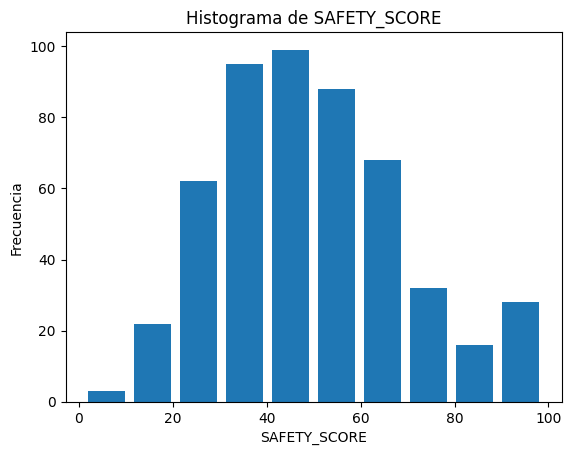

In [20]:
#histograma de la variable SAFETY_SCORE
import matplotlib.pyplot as plt
plt.hist(df['SAFETY_SCORE'], histtype='bar', rwidth=0.8)
plt.xlabel('SAFETY_SCORE')
plt.ylabel('Frecuencia')
plt.title('Histograma de SAFETY_SCORE')
plt.show()

In [21]:
df.describe(include='all')

,School_ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,...,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location,SAFETY_SCORE_Binned
count,566.000000,566,566,566,566,566,566.000000,566,565,566,...,5.660000e+02,5.660000e+02,566.000000,566.000000,566.000000,566,566.000000,566.000000,566,513
unique,NaN,566,3,550,1,1,NaN,564,565,20,...,NaN,NaN,NaN,NaN,NaN,77,NaN,NaN,550,5
top,NaN,Abraham Lincoln Elementary School,ES,3120 S Kostner Ave,Chicago,IL,NaN,(773) 534-1530,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,NaN,NaN,NaN,NaN,NaN,AUSTIN,NaN,NaN,"(41.83601953, -87.73419465)",Moderate
freq,NaN,1,462,4,566,566,NaN,2,1,41,...,NaN,NaN,NaN,NaN,NaN,23,NaN,NaN,4,187
mean,609681.791519,NaN,NaN,NaN,NaN,NaN,60629.727915,NaN,NaN,NaN,...,1.163016e+06,1.885663e+06,41.841890,-87.677323,37.706714,NaN,22.060071,11.710247,NaN,NaN
std,8831.060946,NaN,NaN,NaN,NaN,NaN,20.248024,NaN,NaN,NaN,...,1.605930e+04,3.285688e+04,0.090361,0.058390,21.584135,NaN,13.645574,6.688582,NaN,NaN
min,400018.000000,NaN,NaN,NaN,NaN,NaN,60605.000000,NaN,NaN,NaN,...,1.118114e+06,1.817242e+06,41.653674,-87.841052,1.000000,NaN,1.000000,1.000000,NaN,NaN
25%,609873.250000,NaN,NaN,NaN,NaN,NaN,60618.000000,NaN,NaN,NaN,...,1.152166e+06,1.860248e+06,41.771866,-87.717152,23.000000,NaN,10.000000,7.000000,NaN,NaN
50%,610052.500000,NaN,NaN,NaN,NaN,NaN,60625.000000,NaN,NaN,NaN,...,1.163553e+06,1.886889e+06,41.845521,-87.675878,31.500000,NaN,21.000000,10.000000,NaN,NaN
75%,610212.750000,NaN,NaN,NaN,NaN,NaN,60639.000000,NaN,NaN,NaN,...,1.174256e+06,1.911652e+06,41.913584,-87.636059,58.000000,NaN,32.750000,17.000000,NaN,NaN


In [22]:
pd.get_dummies(df['Elementary, Middle, or High School'])

,ES,HS,MS
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,True,False
...,...,...,...
561,True,False,False
562,True,False,False
563,True,False,False
564,True,False,False


In [27]:
import pandas as pd
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv('auto.csv', names = headers)

In [28]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [29]:
drive_wheels_counts = df['drive-wheels'].value_counts()
drive_wheels_counts.rename_axis('drive-wheels').reset_index(name='counts')

,drive-wheels,counts
0,fwd,120
1,rwd,76
2,4wd,9


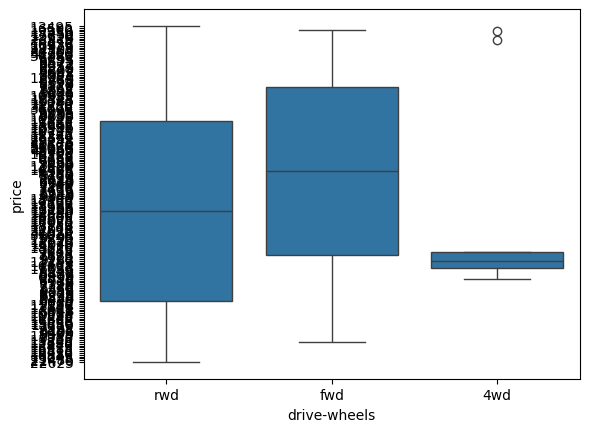

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# evitar que se aglomere el eje y
sns.boxplot(x='drive-wheels', y='price', data=df)
plt.show()